In [2]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from scipy.stats import chi2_contingency
from sklearn.manifold import TSNE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, confusion_matrix

## Import data

In [28]:
mytrain= pd.read_csv( 'german-train-cate.csv')
mytest =  pd.read_csv( 'C:\\Users\Alice\Downloads\German_Credit_TEST.csv')


In [84]:
mytrain_sub= pd.read_csv( 'C:\\Users\Alice\Downloads\german-train.csv')
pcadata= pd.read_csv( 'C:\\Users\Alice\Downloads\pca-data.csv')

In [85]:
mytrain_sub=mytrain_sub.drop(['Unnamed: 0','Duration of Credit (month)','Credit Amount','Age (years)','kmeans2','kmeans3','No of Credits at this Bank','Account Balance_1'],axis=1)

In [86]:
mytrain_sub.head()

ID  Guarantors  No of dependents  Telephone  Foreign Worker  \
0  151           0                 0          0               1   
1  152           0                 0          0               1   
2  153           0                 0          0               1   
3  154           0                 0          0               1   
4  155           0                 1          0               0   

   Creditability  Account Balance_Negative  Account Balance_no account  \
0              0                         1                           0   
1              1                         1                           0   
2              0                         1                           0   
3              1                         1                           0   
4              1                         0                           0   

   Account Balance_poor  Account Balance_rich  ...  Occupation_unskilled  \
0                     0                     0  ...                     0   
1                     0                     0  ...                     0   
2                     0                     0  ...                     0   
3                     0                     0  ...                     1   
4                     0                     1  ...                     1   

   AgeGroup_Youth  AgeGroup_Adult  AgeGroup_Old.Adult  \
0               0               0                   1   
1               0               0                   1   
2               0               1                   0   
3               1               0                   0   
4               0               1                   0   

   Duration of credit_within 1 year  Duration of credit_within 2 year  \
0                                 0                                 0   
1                                 0                                 1   
2                                 0                                 1   
3                                 0                                 1   
4                                 1                                 0   

   Duration of credit_more than 2 year  Credit Amount Group_less than 2k  \
0                                    1                                 0   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Credit Amount Group_middle  Credit Amount Group_more than 10k  
0                           1                                  0  
1                           0                                  0  
2                           0                                  0  
3                           0                                  0  
4                           0                                  0  

[5 rows x 65 columns]

## Data reduction

In [85]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [91]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(newtrain.values)
pcadata['pca-one'] = pca_result[:,0]
pcadata['pca-two'] = pca_result[:,1] 
pcadata['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

ValueError: could not convert string to float: 'Negative'

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

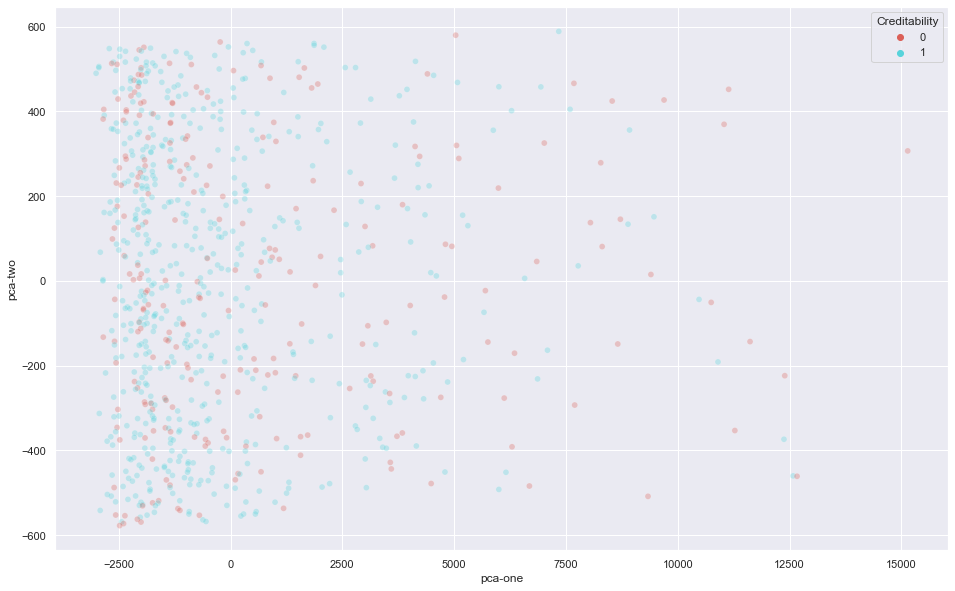

In [19]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    legend="full",
    alpha=0.3
)

In [95]:
pc = mytrain
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pc)

ValueError: could not convert string to float: 'Negative'

In [93]:

pc['tsne-2d-one'] = tsne_results[:,0]
pc['tsne-2d-two'] = tsne_results[:,1]

<ipython-input-93-fac304ebf161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-93-fac304ebf161>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc['tsne-2d-two'] = tsne_results[:,1]


In [94]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Account Balance",
    palette=sns.color_palette("hls", 2),
    data=pc,
    legend="full",
    alpha=0.3
)

ValueError: Could not interpret value `` for parameter `hue`

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

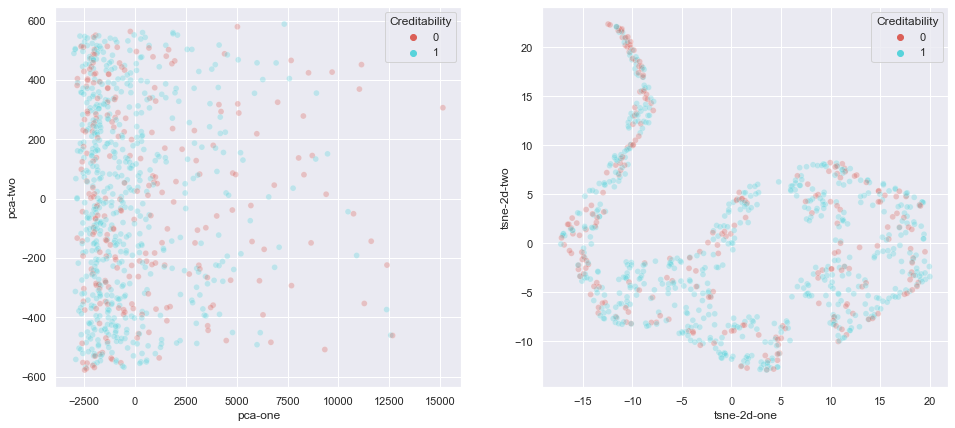

In [26]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [53]:
p=['tsne-2d-one','tsne-2d-two']
tsenk= mytrain[p]

In [58]:
kmeans3 = KMeans(n_clusters=3)
mytrain['kmeans3'] = kmeans3.fit_predict(tsenk)

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

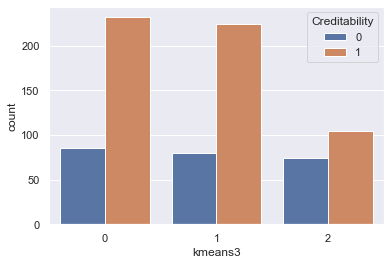

In [84]:
sns.countplot(x='kmeans3',hue='Creditability',data=mytrain)

## Adding data from R

In [199]:
pca=pd.read_csv( 'C:\\Users\Alice\Downloads\pca2.csv')
mytrain['kmeans3'] = pca['kmeans3']
mytrain['kmeans4'] = pca['kmeans4']
mytrain['kmeans3.all'] = pca['kmeans3.all']
mytrain['kmeans4.all'] = pca['kmeans4.all']

In [7]:
plt.subplot(2)
sns.countplot(x='Purpose',hue='Creditability',data=mytrain)
sns.countplot(x='Account Balance',hue='Creditability',data=mytrain)

ValueError: Single argument to subplot must be a three-digit integer, not 2

In [87]:
k = mytrain.drop('ID','Duration of Credit (month)','Credit Amount','Age (years)','pca-one','pca-two','pca-three','tsne-2d-one','tsne-2d-two')

TypeError: drop() takes from 1 to 8 positional arguments but 10 were given

## Create groups for continuous data 
### Age, Credit Amount and Duration of credit

In [29]:
#making age group 19-25, 26-36, 37 up
bins= [19,25,36,75]
labels = ['Youth','Adult','Old.Adult']
mytrain['AgeGroup'] = pd.cut(mytrain['Age (years)'], bins=bins, labels=labels, right=False)
mytest['AgeGroup'] = pd.cut(mytest['Age (years)'], bins=bins, labels=labels, right=False)

# duration of credit group in train data
# less than 1 yr, 1-2 yr, more than 2 yr 
bins= [4,12,24,72]
labels = ['within 1 year','within 2 year','more than 2 year']
mytrain['Duration of credit'] = pd.cut(mytrain['Duration of Credit (month)'], bins=bins, labels=labels, right=False)
mytest['Duration of credit'] = pd.cut(mytest['Duration of Credit (month)'], bins=bins, labels=labels, right=False)

# credit amount group 
bins= [276,1995,9960,18424]
labels = ['less than 2k','middle','more than 10k']
mytrain['Credit Amount Group'] = pd.cut(mytrain['Credit Amount'], bins=bins, labels=labels, right=False)
mytest['Credit Amount Group'] = pd.cut(mytest['Credit Amount'], bins=bins, labels=labels, right=False)



In [104]:
mytest.to_csv("german-test-cate.csv")

## Data explortary with Creditability

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

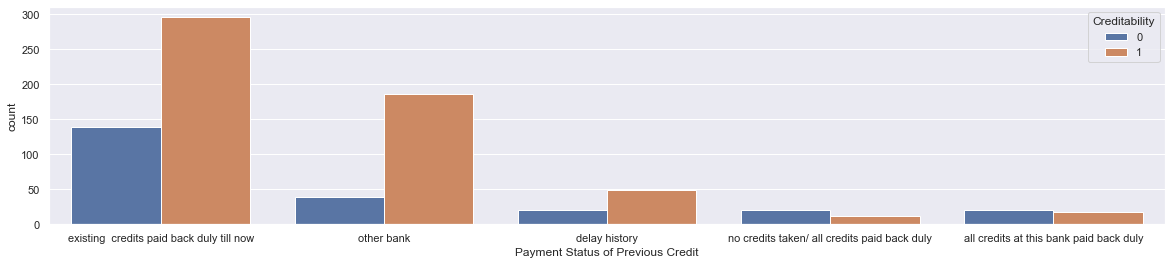

In [11]:
plt.figure(figsize=(20,4)) 
sns.countplot(x='Payment Status of Previous Credit',hue='Creditability',data=mytrain)

<AxesSubplot:xlabel='Age (years)', ylabel='count'>

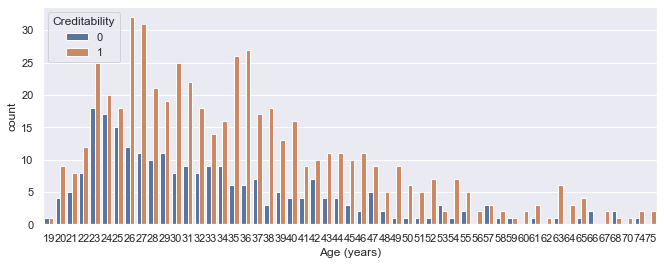

In [101]:
plt.figure(figsize=(11,4)) 
sns.countplot(x='Age (years)',hue ='Creditability',data=mytrain)

Text(0, 0.5, 'Number of people')

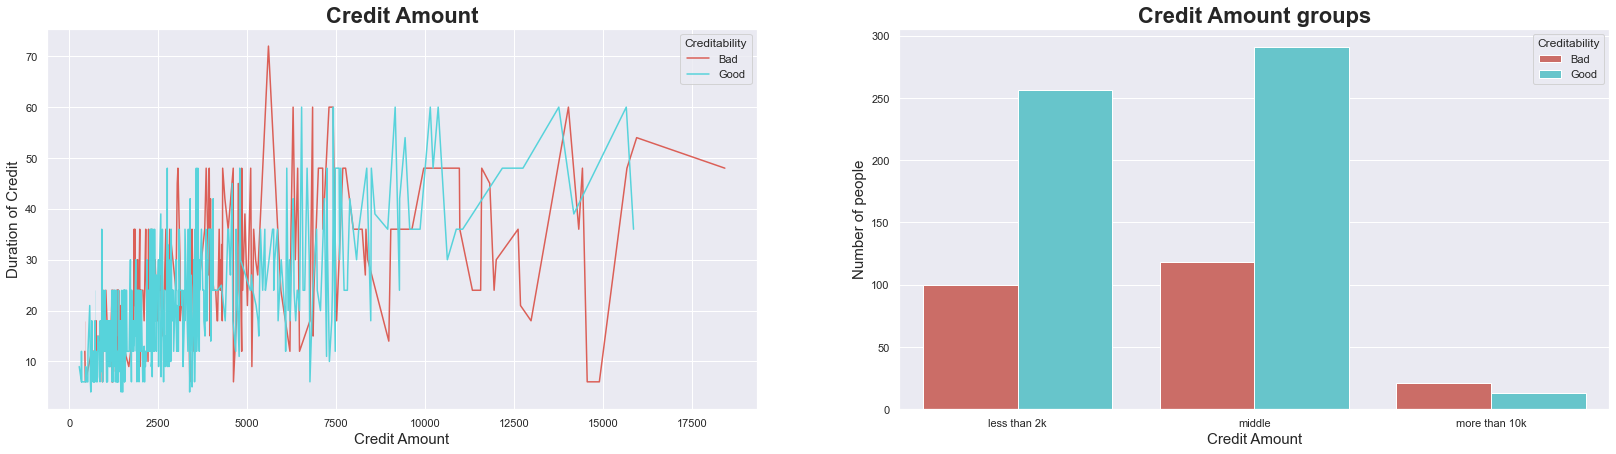

In [56]:
plt.figure(figsize=(28,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.lineplot(
    x="Credit Amount",
    y="Duration of Credit (month)",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Credit Amount',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar.set_xlabel('Credit Amount', fontsize = 15)
bar.set_ylabel('Duration of Credit', fontsize = 15)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.countplot(
    x="Credit Amount Group",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Credit Amount groups',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar2.set_xlabel('Credit Amount', fontsize = 15)
bar2.set_ylabel('Number of people', fontsize = 15)

<AxesSubplot:xlabel='Credit Amount', ylabel='Duration of Credit (month)'>

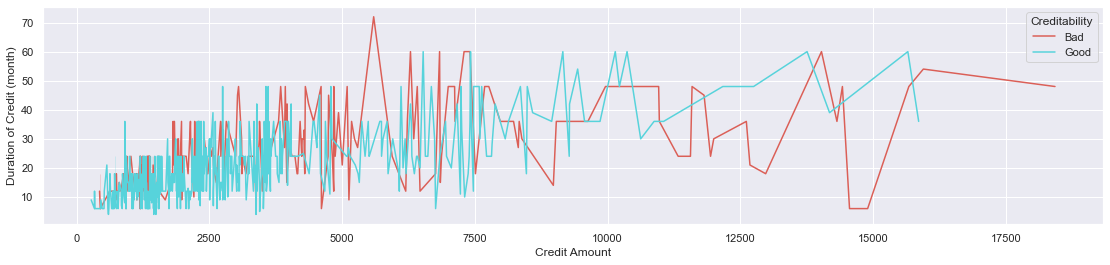

In [55]:
plt.figure(figsize=(19,4)) 
sns.lineplot(x="Credit Amount",y="Duration of Credit (month)",hue="Creditability",palette=sns.color_palette("hls", 2),data=mytrain)

<AxesSubplot:xlabel='Account Balance', ylabel='count'>

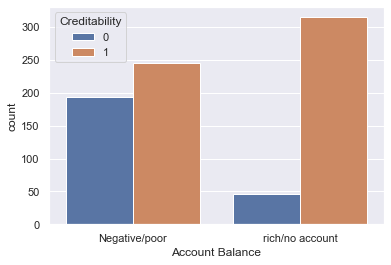

In [202]:
sns.countplot(x='Account Balance',hue ='Creditability',data=mytrain)
# no account people got creditability the most

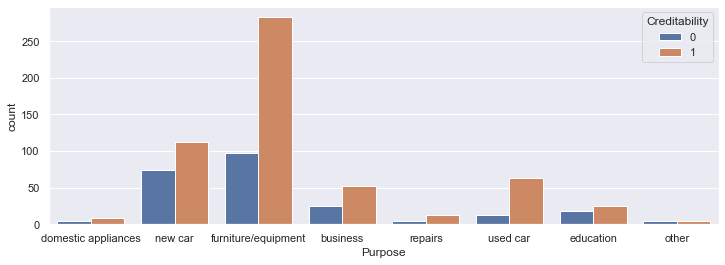

In [7]:
plt.figure(figsize=(12,4)) 
sns.countplot(x="Purpose",hue='Creditability', data=mytrain)
plt.show()
# used car could have higher chance to get money.
# furniture/ equipment is a popular reason to apply credit 

<AxesSubplot:xlabel='Type of apartment', ylabel='count'>

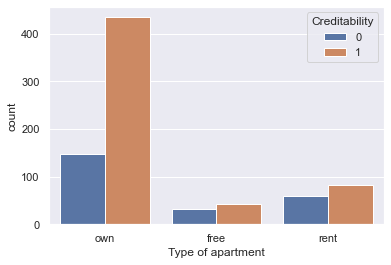

In [8]:
sns.countplot(x="Type of apartment",hue='Creditability', data=mytrain)

In [97]:
mytraindum.head()

ID  Duration of Credit (month)  Credit Amount  Guarantors  Age (years)  \
0  151                          48           3051           0           54   
1  152                          21            571           0           65   
2  153                          18           1345           0           26   
3  154                          15            806           0           22   
4  155                           4           1494           0           29   

   No of dependents  Telephone  Foreign Worker  Creditability  \
0                 0          0               1              0   
1                 0          0               1              1   
2                 0          0               1              0   
3                 0          0               1              1   
4                 1          0               0              1   

   Account Balance_Negative  ...  AgeGroup_Adult  AgeGroup_Old.Adult  \
0                         1  ...               0                   1   
1                         1  ...               0                   1   
2                         1  ...               1                   0   
3                         1  ...               0                   0   
4                         0  ...               1                   0   

   Duration of credit_within 1 year  Duration of credit_within 2 year  \
0                                 0                                 0   
1                                 0                                 1   
2                                 0                                 1   
3                                 0                                 1   
4                                 1                                 0   

   Duration of credit_more than 2 year  Credit Amount Group_less than 2k  \
0                                    1                                 0   
1                                    0                                 1   
2                                    0                                 1   
3                                    0                                 1   
4                                    0                                 1   

   Credit Amount Group_middle  Credit Amount Group_more than 10k  \
0                           1                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   No of Credits at this Bank_1  No of Credits at this Bank_more than 1  
0                             1                                       0  
1                             0                                       1  
2                             1                                       0  
3                             1                                       0  
4                             1                                       0  

[5 rows x 71 columns]

Text(0, 0.5, 'Number of people')

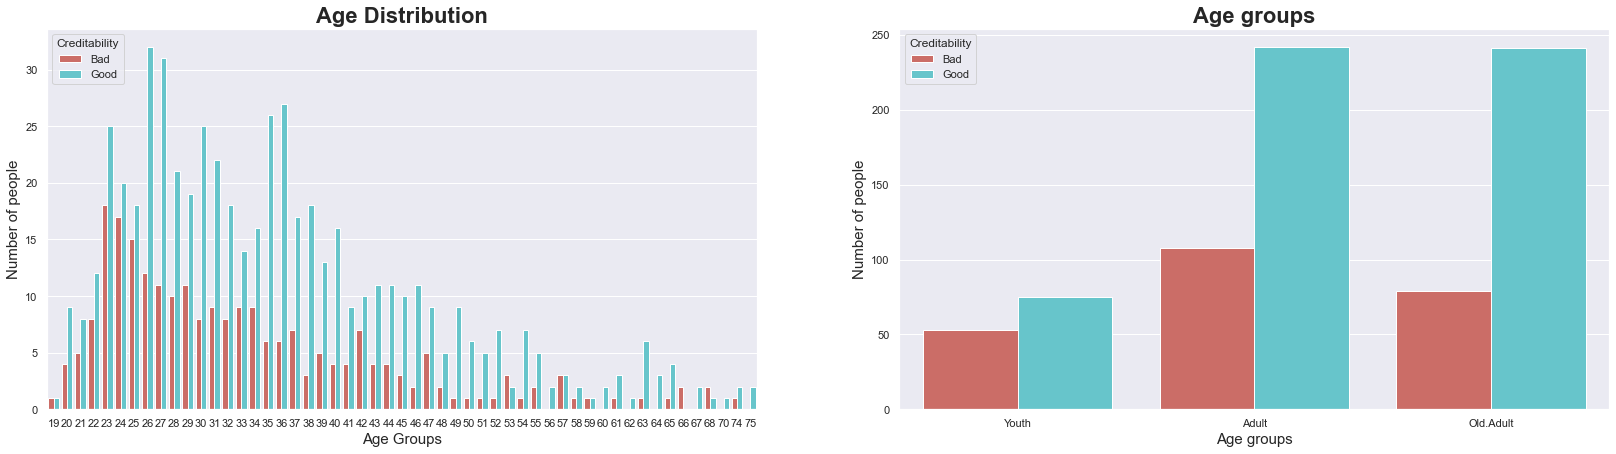

In [53]:
plt.figure(figsize=(28,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.countplot(
    x="Age (years)",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Age Distribution',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar.set_xlabel('Age Groups', fontsize = 15)
bar.set_ylabel('Number of people', fontsize = 15)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.countplot(
    x="AgeGroup",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Age groups',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar2.set_xlabel('Age groups', fontsize = 15)
bar2.set_ylabel('Number of people', fontsize = 15)

In [52]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.histplot(
    x="Credit Amount",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Credit Amount',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar.set_xlabel('Credit Amount', fontsize = 13)
bar.set_ylabel('Number of people', fontsize = 13)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.histplot(
    x="Credit Amount Group",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Credit Amount groups',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar2.set_xlabel('Credit Amount groups', fontsize = 13)
bar2.set_ylabel('Number of people', fontsize = 13)

ConversionError: Failed to convert value(s) to axis units: 0             middle
1       less than 2k
2       less than 2k
3       less than 2k
4       less than 2k
           ...      
795     less than 2k
796           middle
797    more than 10k
798     less than 2k
799           middle
Name: x, Length: 800, dtype: category
Categories (3, object): ['less than 2k' < 'middle' < 'more than 10k']

Text(0, 0.5, 'Number of people')

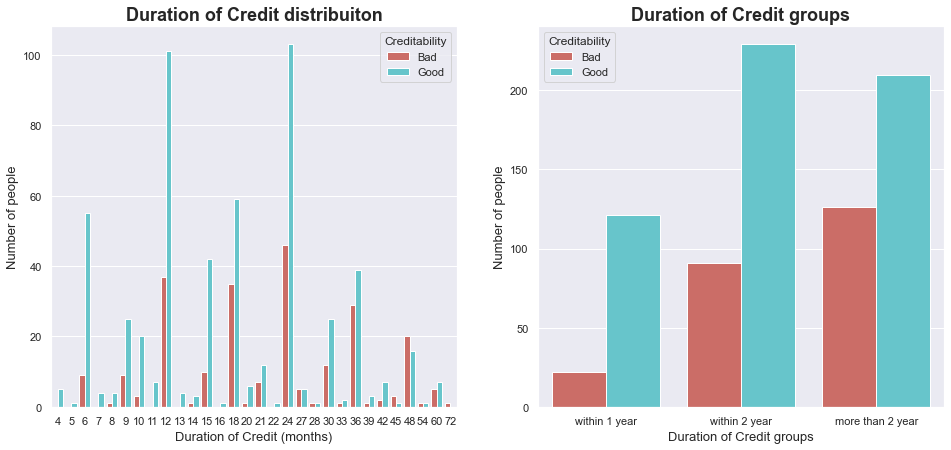

In [42]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.countplot(
    x="Duration of Credit (month)",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Duration of Credit distribuiton',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar.set_xlabel('Duration of Credit (months)', fontsize = 13)
bar.set_ylabel('Number of people', fontsize = 13)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.countplot(
    x="Duration of credit",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Duration of Credit groups',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar2.set_xlabel('Duration of Credit groups', fontsize = 13)
bar2.set_ylabel('Number of people', fontsize = 13)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

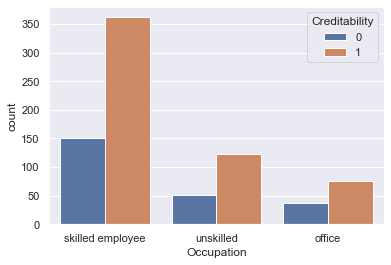

In [8]:
sns.countplot(x="Occupation",hue='Creditability', data=mytrain)
# skilled could get approval more

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

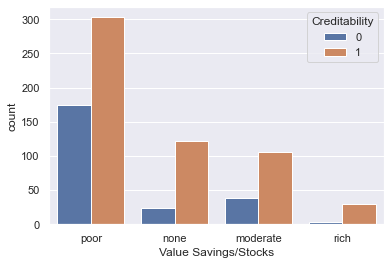

In [9]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)
# seems like it does not matter how many saving 

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

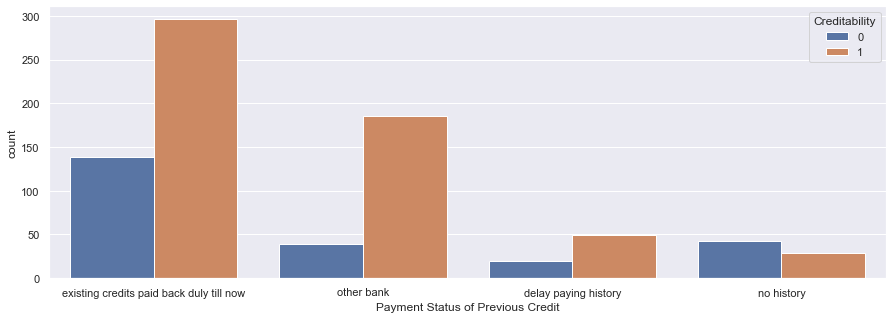

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x="Payment Status of Previous Credit",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Length of current employment', ylabel='count'>

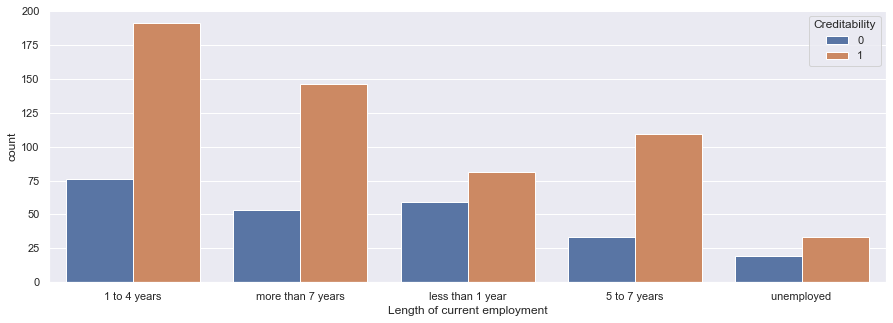

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x="Length of current employment",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Duration of Credit (month)', ylabel='count'>

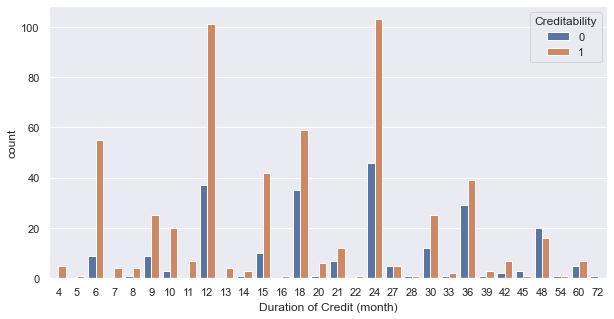

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x="Duration of Credit (month)",hue='Creditability', data=mytrain)
# lower duration could probably approve creditability 

<AxesSubplot:xlabel='Age (years)', ylabel='count'>

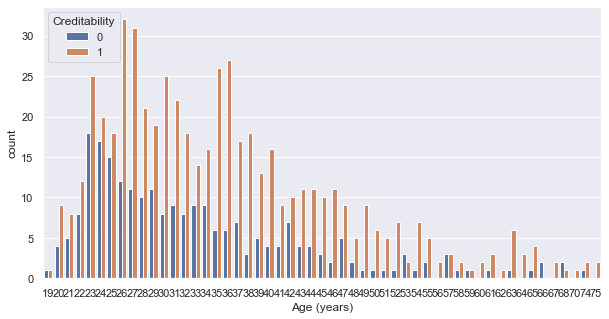

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="Age (years)",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

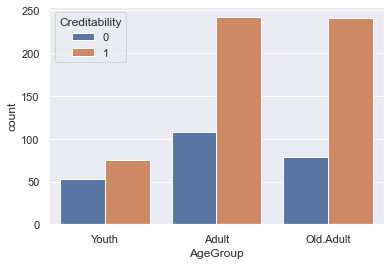

In [13]:
sns.countplot(x="AgeGroup",hue='Creditability', data=mytrain) 

<AxesSubplot:xlabel='Credit Amount Group', ylabel='count'>

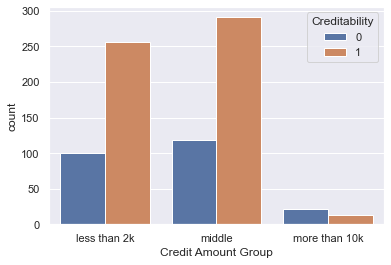

In [14]:
sns.countplot(x="Credit Amount Group",hue='Creditability', data=mytrain) 

<AxesSubplot:xlabel='Duration of credit', ylabel='count'>

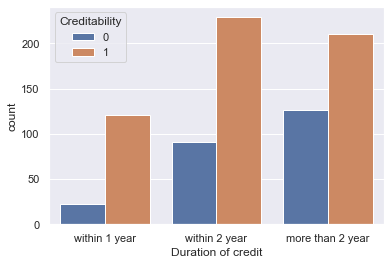

In [15]:
sns.countplot(x="Duration of credit",hue='Creditability', data=mytrain) 

<AxesSubplot:xlabel='Instalment per cent', ylabel='count'>

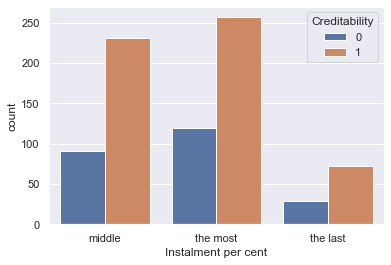

In [16]:

sns.countplot(x="Instalment per cent",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

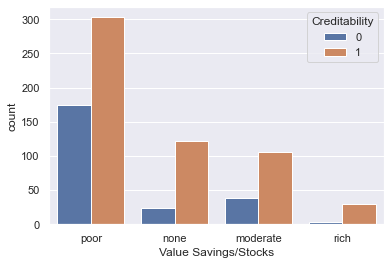

In [17]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Concurrent Credits', ylabel='count'>

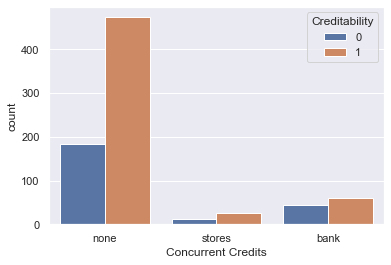

In [18]:

sns.countplot(x="Concurrent Credits",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Most valuable available asset', ylabel='count'>

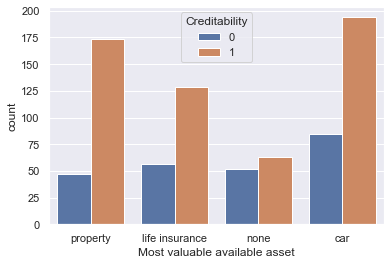

In [19]:
sns.countplot(x="Most valuable available asset",hue='Creditability', data=mytrain)

## Convert categorical data to dummy variables 

In [87]:
mytraindum=pd.get_dummies(mytrain, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation','AgeGroup','Duration of credit','Credit Amount Group', 'No of Credits at this Bank'])

mytestdum=pd.get_dummies(mytest, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation','AgeGroup','Duration of credit','Credit Amount Group'])

## Drop string data for predictive models 

In [88]:
# split train and test data

k = mytraindum.drop(['ID','Age (years)','Duration of Credit (month)','Credit Amount','Creditability','Sex_female'],axis=1)
j= mytraindum['Creditability']
X_train, X_test, y_train, y_test = train_test_split(k, j, test_size=0.33, random_state=0)

## Recursive Feature Elimination
### Selecting the variables for the model based on ranking    

In [90]:
#using RFE to select important feature for logistic regression
#select 25 variables for the model

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
model = LogisticRegression(solver='liblinear')
rfe.fit(k, j)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [ ]:
pd.read_csv("doc.csv")

In [91]:
print(rfe.support_)

# those variables above are selected based on RFE

[False False False  True False  True False False False False  True False
  True False False  True False  True False  True  True False False  True
 False False False  True False False False False False False False False
 False False  True False False  True False False False False False False
 False  True False False False False False False False  True False False
 False False  True False False]


In [92]:
print(rfe.ranking_)
# 'Foreign Worker','Account Balance_no account','Purpose_education','Purpose_new car','Value Savings/Stocks_none','Value Savings/Stocks_rich','Payment Status of Previous Credit_no history','Type of apartment_rent','Duration of credit_within 1 year','Credit Amount Group_more than 10k'
#increase 'Purpose_used car','Payment Status of Previous Credit_other bank','Payment Status of Previous Credit_other bank','Most valuable available asset_none','Credit Amount Group_middle'

[15 20 12  1  3  1  4 18 43 17  1 35  1 37 47  1 24  1  5  1  1 16 44  1
  2 25 10  1 51 31 45 46 29 28 39 30 14 48  1 49 42  1  8 41 26 38 50 22
 23  1 34 32  9 33 19 21 40  1 36  6 11  7  1 27 13]


In [94]:
k.to_csv("rfe.csv")

In [93]:
print(k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 65 columns):
 #   Column                                                                          Non-Null Count  Dtype
---  ------                                                                          --------------  -----
 0   Guarantors                                                                      800 non-null    int64
 1   No of dependents                                                                800 non-null    int64
 2   Telephone                                                                       800 non-null    int64
 3   Foreign Worker                                                                  800 non-null    int64
 4   Account Balance_Negative                                                        800 non-null    uint8
 5   Account Balance_no account                                                      800 non-null    uint8
 6   Account Balance_poor              

In [88]:
# put those selected variables together 
cols= ['Foreign Worker','Account Balance_no account','Account Balance_Negative','Purpose_education','Purpose_new car','Value Savings/Stocks_none','Value Savings/Stocks_poor','Value Savings/Stocks_rich','Payment Status of Previous Credit_no credits taken/ all credits paid back duly','Type of apartment_rent','Duration of credit_within 1 year','Credit Amount Group_more than 10k','Purpose_used car','Payment Status of Previous Credit_other bank','Duration in Current address_less than 1 year','Length of current employment_less than 1  year','Type of apartment_own']

X= mytraindum[cols]
y=mytraindum['Creditability']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=0
)


## Logistic regression

In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.464400
         Iterations 7
                                                        Results: Logit
Model:                                   Logit                                Pseudo R-squared:                     0.238     
Dependent Variable:                      Creditability                        AIC:                                  479.8241  
Date:                                    2021-06-01 15:03                     BIC:                                  550.7785  
No. Observations:                        480                                  Log-Likelihood:                       -222.91   
Df Model:                                16                                   LL-Null:                              -292.36   
Df Residuals:                            463                                  LLR p-value:                          1.1822e-21
Converged:                               1.0000                  

In [81]:

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [82]:
f1_score(y_test,y_pred)

0.8207343412526996

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 47  50]
 [ 33 190]]


### Got 86% F1 score in regression model

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50       104
           1       0.76      0.90      0.82       216

    accuracy                           0.74       320
   macro avg       0.71      0.65      0.66       320
weighted avg       0.72      0.74      0.72       320



## Cross validation for logistic regression
#### To estimate different size data accuracy

In [34]:
from sklearn.model_selection import cross_val_score

In [66]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.70833333 0.79166667 0.77083333 0.79166667 0.75       0.77083333
 0.79166667 0.72916667 0.77083333 0.79166667]


### The average accuracy is 75% and the max is 79%

In [67]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7083333333333334, 0.7666666666666667, 0.7916666666666666)

## Experiments with ensemble learning
#### didn't work well. the higgest one on kaggle is 90%
#### Classification works better than regression in each ensemble learning   

In [68]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe2 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model2 = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])


In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model3 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model3.fit(X_train, y_train)
model3.score(X_test,y_test)

0.653125

In [70]:
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(random_state=1)
model6.fit(X_train, y_train)
model6.score(X_test,y_test)

0.7375

In [71]:
from sklearn.metrics import f1_score
i = model6.predict(X_test)
f1_score(i,y_test)

0.8141592920353983

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
model7= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model7.fit(X_train, y_train)
model7.score(X_test,y_test)

0.696875

In [42]:
from sklearn.ensemble import BaggingRegressor
model4 = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model4.fit(X_train, y_train)
model4.score(X_test,y_test)

0.1843563888320242

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
model5 = GradientBoostingRegressor()
model5.fit(X_train, y_train)
model5.score(X_test,y_test)

0.26505179940534807

## Random forest

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [75]:
#random forest 
clf=RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,                                         max_features = "auto", min_samples_leaf = 60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("F1 score:",f1_score(y_test, y_pred))


F1 score: 0.8059701492537313


## Correlation of variables in predictive model

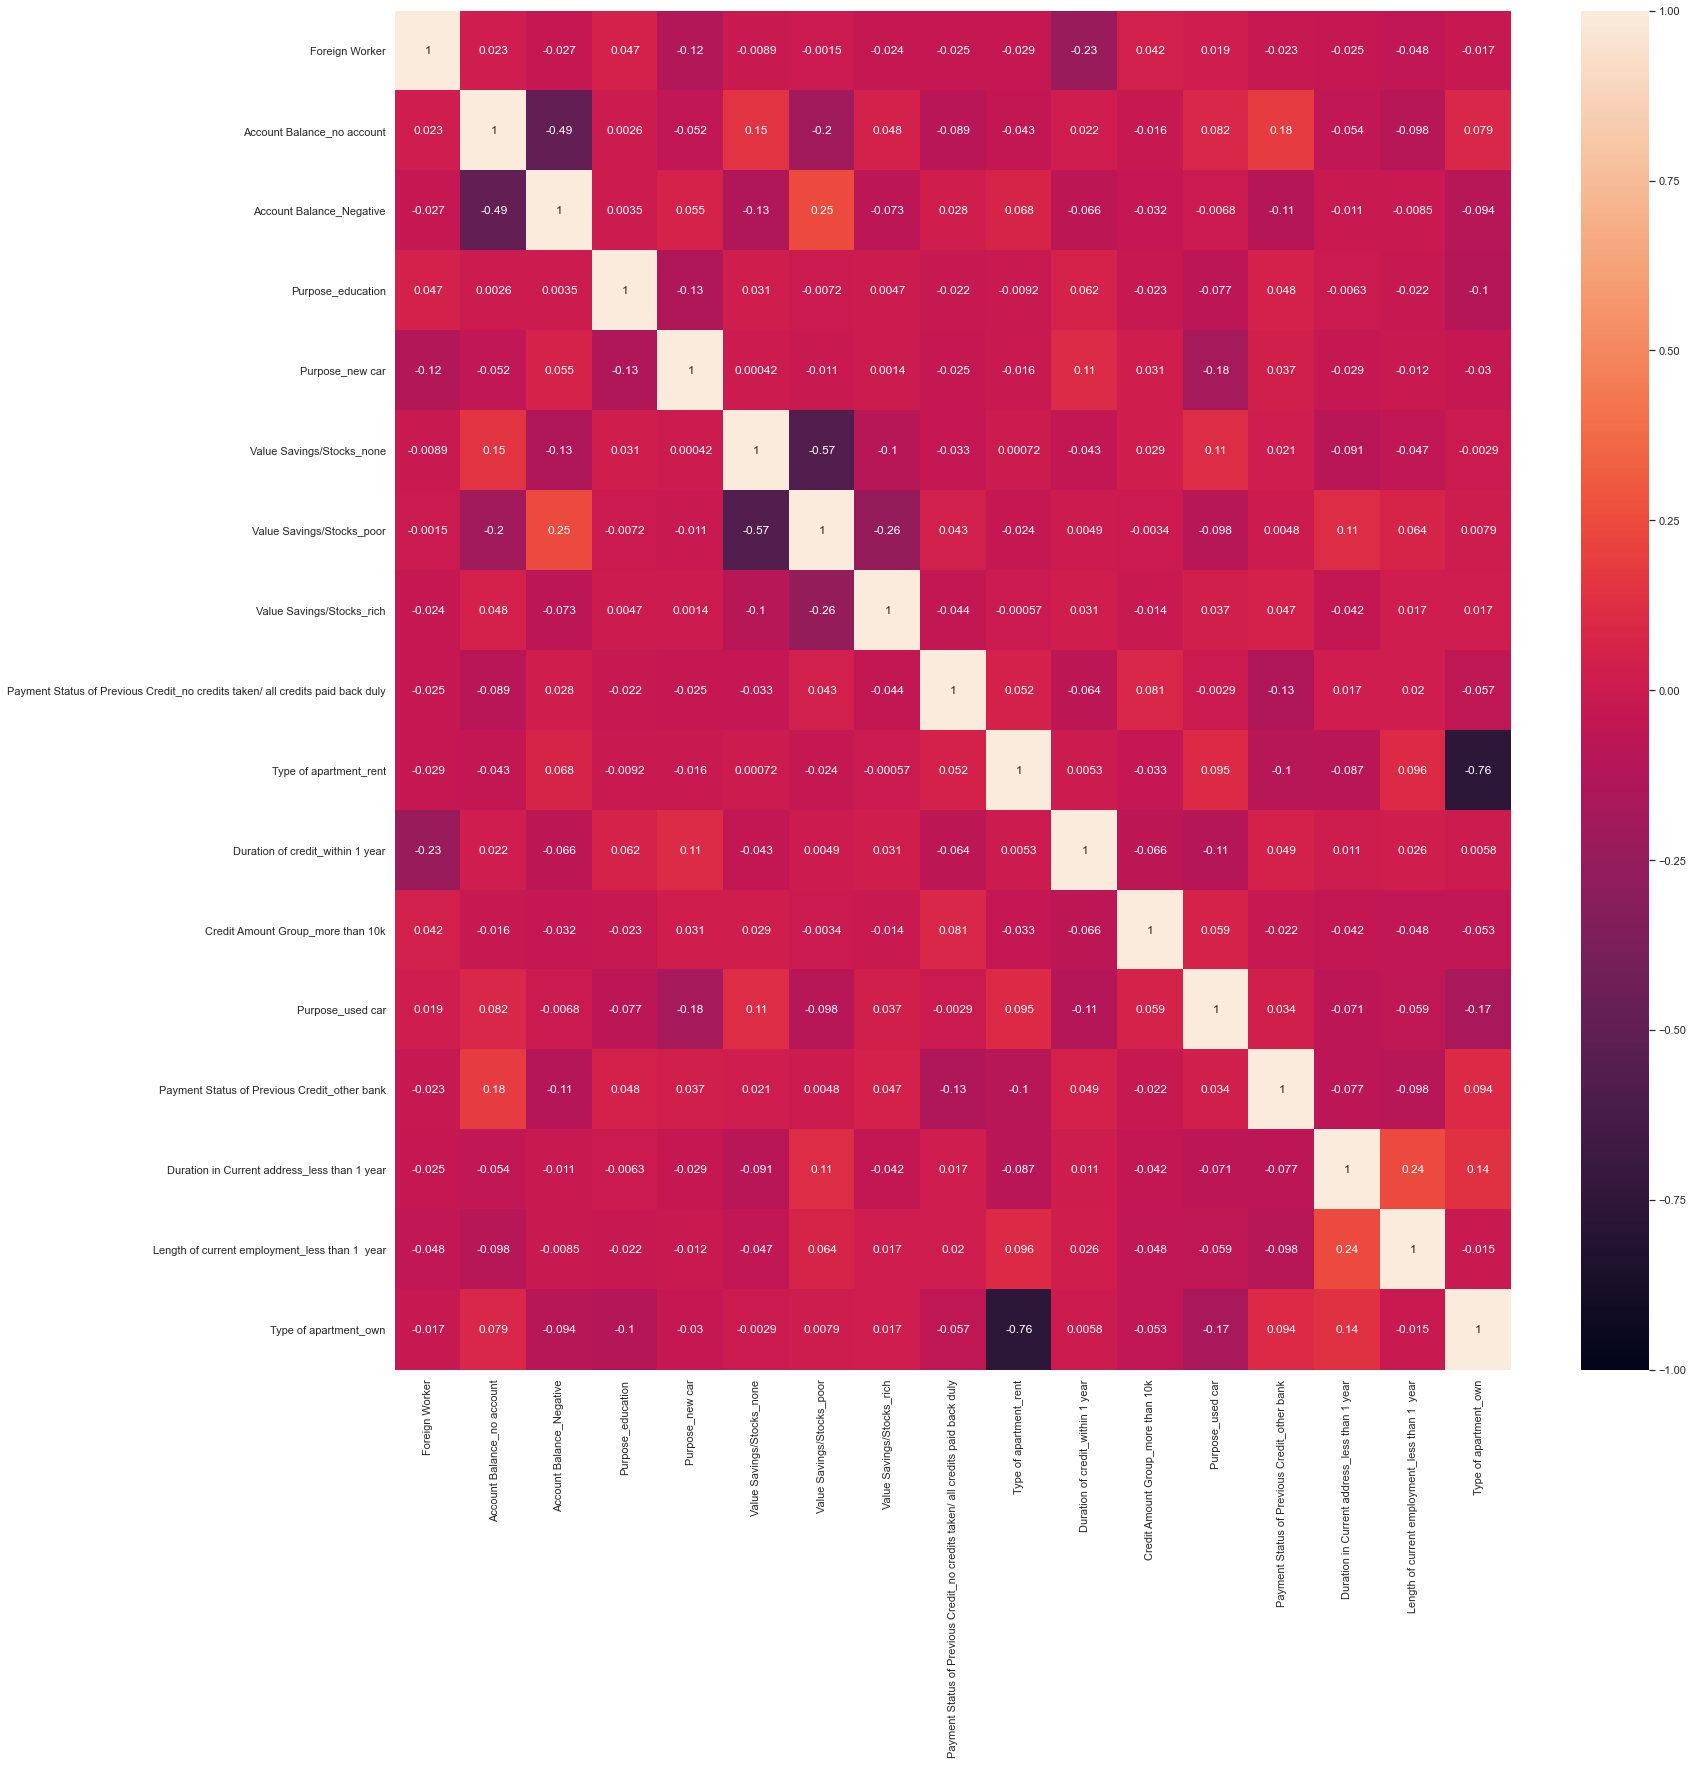

In [78]:
X1= mytraindum[cols]
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(X1.corr(), vmin=-1, vmax=1, annot=True)

## Principal Component Analysis (PCA)
### I did PCA in R and imported the data from it 
### Based the PCA, I chose 26 PC (75% cumulative variance) for 3 & 4 clusters 

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
pca.head()

Unnamed: 0       PC1       PC2       PC3       PC4       PC5       PC6  \
0           1 -0.738520  0.117375 -0.070825 -1.078346  3.432323 -1.134810   
1           2 -1.190553 -2.709305 -2.974590  0.316081 -0.374927 -1.834802   
2           3  2.382573 -1.932208  0.441533 -1.390173  0.991144 -2.555169   
3           4  3.619350 -0.759258 -1.854510 -1.964710  0.673109 -1.505390   
4           5  0.461400 -3.337199 -0.866697 -2.901234  1.261021  3.920088   

        PC7       PC8       PC9  ...      PC18      PC19      PC20      PC21  \
0  0.815161 -0.179516  0.326864  ... -0.707547 -1.791461 -0.333074  0.535213   
1  1.695352 -1.110153 -0.671580  ... -0.699471 -0.165746 -0.392550  0.905799   
2 -0.121665 -0.893112 -1.603739  ... -0.062893 -1.229764 -1.093417  0.841898   
3 -0.908890 -0.264525  1.793662  ...  0.134460  2.299500 -1.110221  0.553482   
4 -1.556334  2.047867  0.000377  ... -0.316751  1.201370  1.415275  1.245675   

       PC22      PC23      PC24      PC25      PC26  kmeans  
0 -0.161501  1.387506 -2.523231  2.520593  1.697096       4  
1  0.375871 -0.485659 -0.657421  0.005033  0.589397       1  
2 -0.665927  1.006096  0.037623 -0.204164  0.404837       1  
3  9.781811  1.463647  6.814434 -3.299933 -3.529893       3  
4 -0.398953  1.409740 -0.707601  0.730766  0.907799       1  

[5 rows x 28 columns]

In [42]:
mytraindum_scaled = StandardScaler().fit_transform(mytraindum)

In [52]:
features = mytraindum_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([5.64405622+0.j, 4.25625213+0.j, 3.36433937+0.j, 2.70312167+0.j,
       2.45044534+0.j])

In [49]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 

In [51]:
projected_1 = mytraindum_scaled.dot(vectors.T[0])
projected_2 = mytraindum_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = mytraindum['Creditability']
res.head()

PC1                 PC2  Y
0  1.559846+0.000000j  0.010554+0.000000j  0
1  0.622595+0.000000j -4.473208+0.000000j  1
2 -2.906892+0.000000j -0.653083+0.000000j  0
3 -3.994395+0.000000j -0.081701+0.000000j  1
4 -1.736046+0.000000j -3.042449+0.000000j  1

## Clustering analysis

In [50]:
import sys
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


In [51]:
from sklearn.cluster import KMeans

In [107]:
kmeans3 = KMeans(n_clusters=3)
mytraindum['kmeans3'] = kmeans3.fit_predict(mytraindum)

In [108]:
mytrain['kmeans2']=mytraindum['kmeans2']
mytrain['kmeans3']=mytraindum['kmeans3']

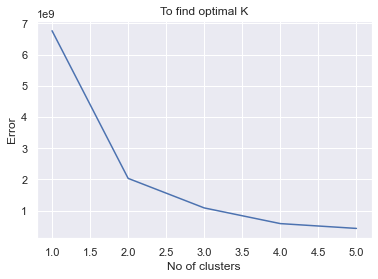

In [34]:
Error =[]
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i).fit(mytraindum)
    kmeans.fit(mytraindum)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 6), Error)
plt.title('To find optimal K')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

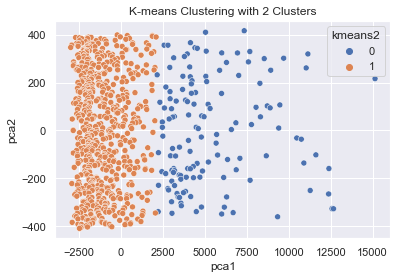

In [110]:
reduced_data = PCA(n_components=2).fit_transform(mytraindum)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results
sns.scatterplot(x="pca1", y="pca2", hue=mytraindum['kmeans2'], data=results)
plt.title('K-means Clustering with 2 Clusters')
plt.show()

## Kmeans based on all variables 

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans4.all'>

<Figure size 864x864 with 0 Axes>

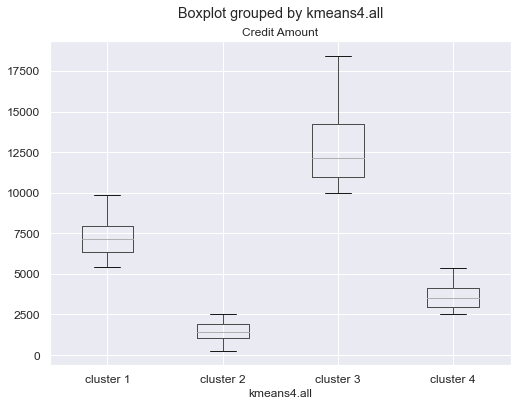

In [182]:
plt.figure(figsize=(12,12))
mytrain.boxplot('Credit Amount','kmeans4.all',fontsize=12,figsize=(8,6))

<AxesSubplot:xlabel='kmeans4.all', ylabel='count'>

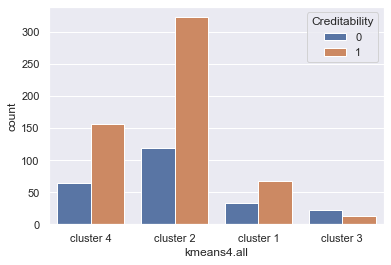

In [186]:
sns.countplot(x='kmeans4.all',hue='Creditability',data=mytrain)

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans3.all'>

<Figure size 864x864 with 0 Axes>

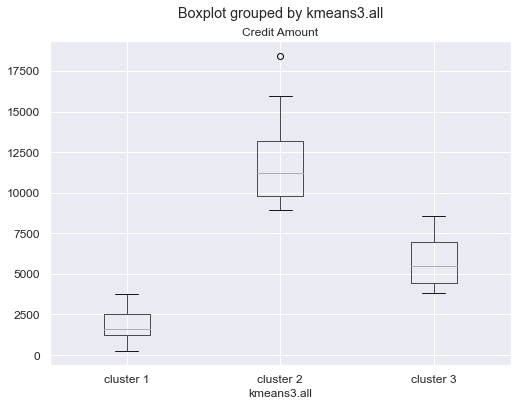

In [183]:
plt.figure(figsize=(12,12))
mytrain.boxplot('Credit Amount','kmeans3.all',fontsize=12,figsize=(8,6))

<AxesSubplot:xlabel='kmeans3.all', ylabel='count'>

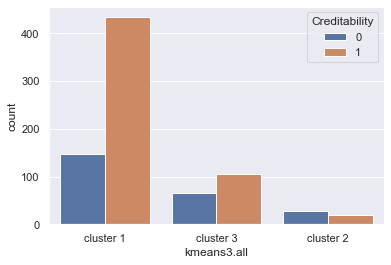

In [184]:
sns.countplot(x='kmeans3.all',hue='Creditability',data=mytrain)

## Kmeans based on PCA

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans4'>

<Figure size 864x864 with 0 Axes>

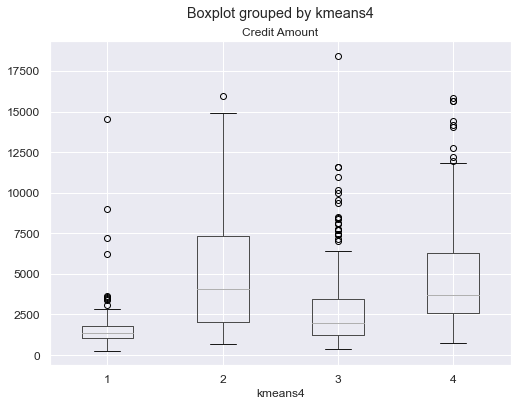

In [70]:
plt.figure(figsize=(12,12))
mytraindum.boxplot('Credit Amount','kmeans4',fontsize=12,figsize=(8,6))
# credit amount vs clusters 
#cluster 0 has average $2500 credit amount while cluster 1 has average $7500

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans3'>

<Figure size 864x864 with 0 Axes>

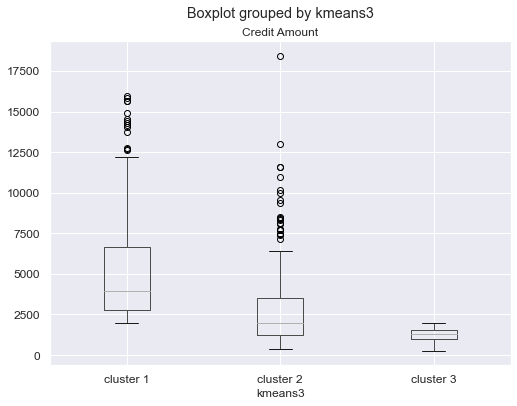

In [79]:
plt.figure(figsize=(12,12))
mytrain.boxplot('Credit Amount','kmeans3',fontsize=12,figsize=(8,6))

<AxesSubplot:title={'center':'Credit Amount'}, xlabel='kmeans3'>

<Figure size 864x864 with 0 Axes>

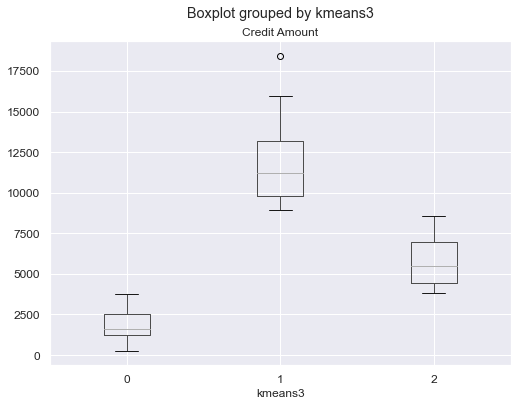

In [112]:
plt.figure(figsize=(12,12))
mytraindum.boxplot('Credit Amount','kmeans3',fontsize=12,figsize=(8,6))

<AxesSubplot:xlabel='kmeans4', ylabel='count'>

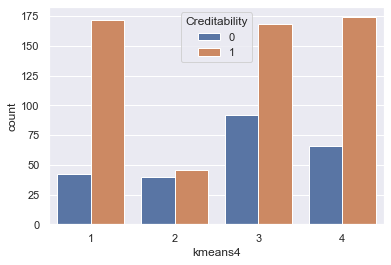

In [75]:
sns.countplot(x='kmeans4',hue='Creditability',data=mytraindum)x

<AxesSubplot:>

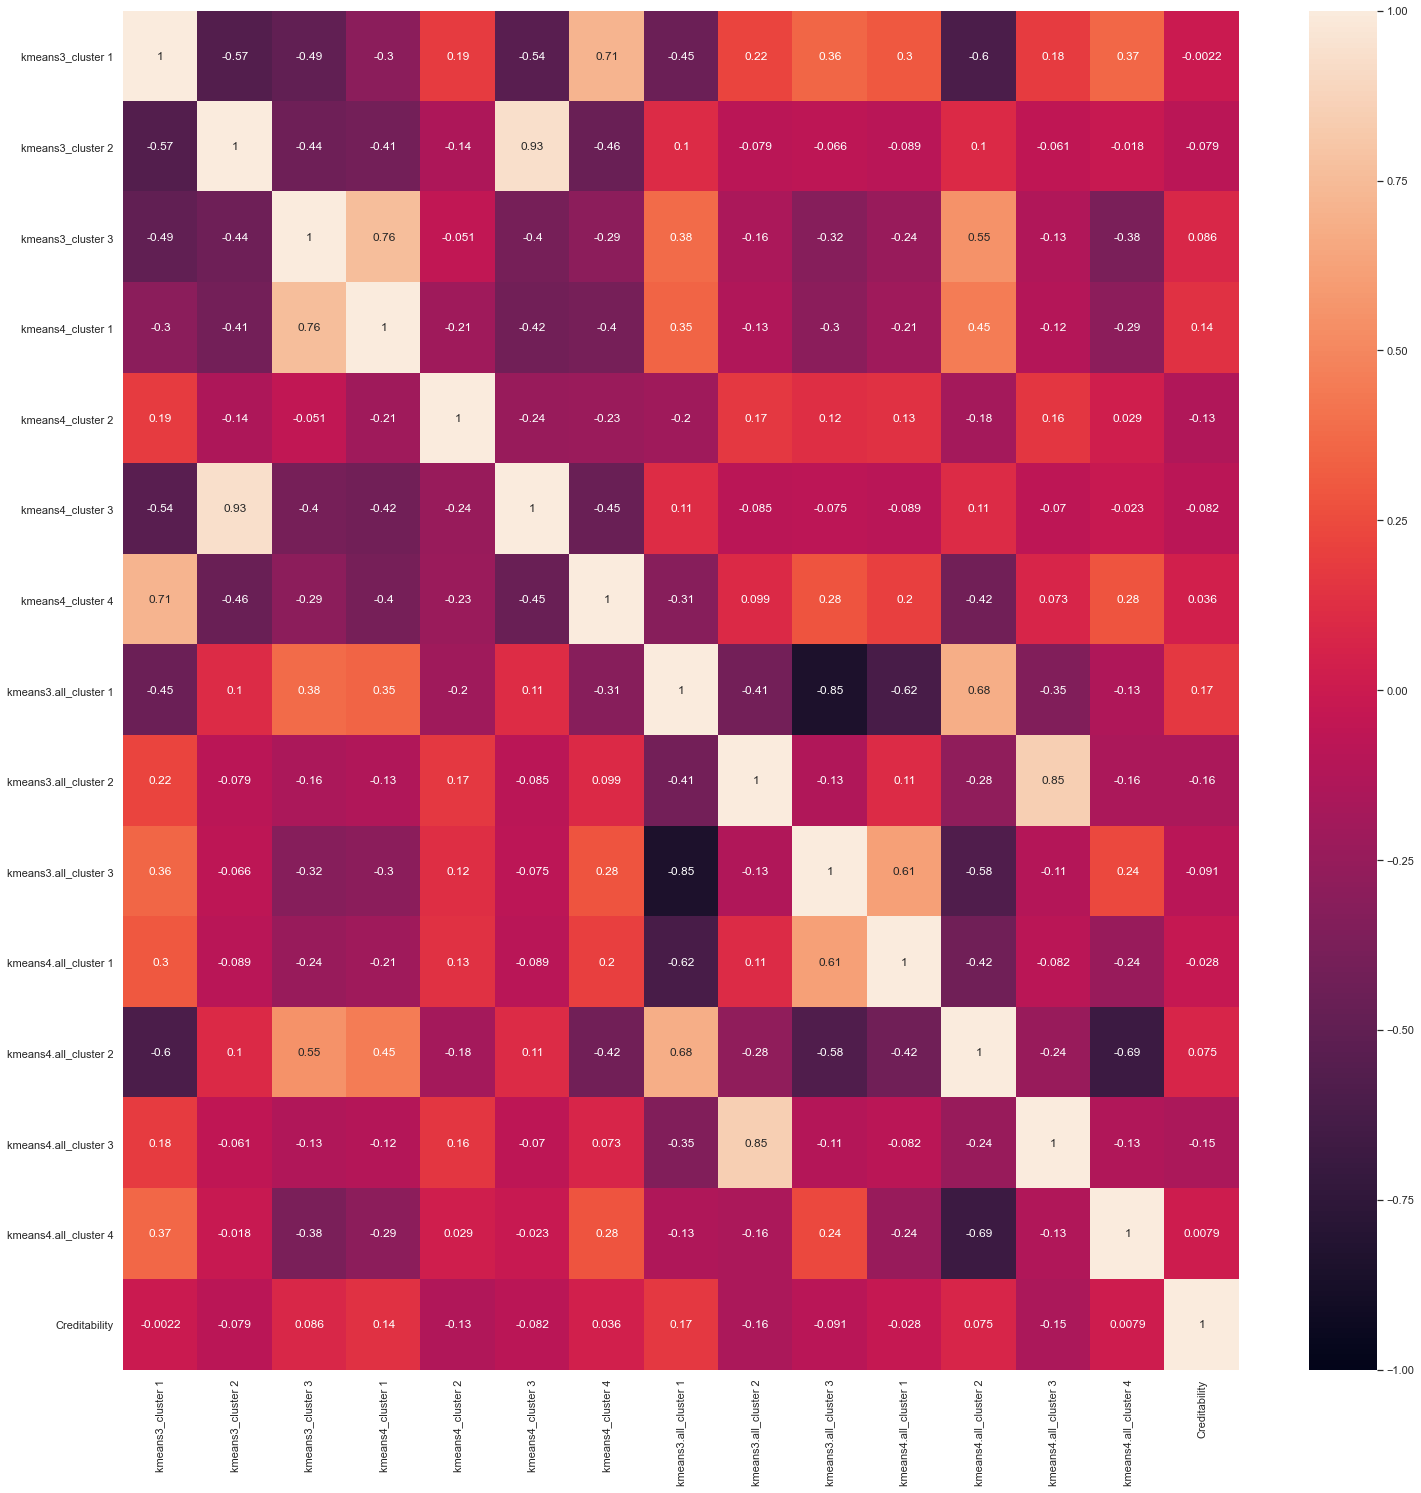

In [333]:
o = ['kmeans3_cluster 1','kmeans3_cluster 2','kmeans3_cluster 3','kmeans4_cluster 1','kmeans4_cluster 2','kmeans4_cluster 3','kmeans4_cluster 4','kmeans3.all_cluster 1','kmeans3.all_cluster 2','kmeans3.all_cluster 3','kmeans4.all_cluster 1','kmeans4.all_cluster 2','kmeans4.all_cluster 3','kmeans4.all_cluster 4','Creditability']
l = mytraindum[o]
plt.figure(figsize=(25, 25))
sns.heatmap(l.corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

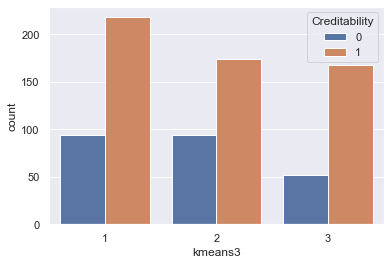

In [76]:
sns.countplot(x='kmeans3',hue='Creditability',data=mytraindum)

<AxesSubplot:title={'center':'Duration of Credit (month)'}, xlabel='kmeans3'>

<Figure size 864x864 with 0 Axes>

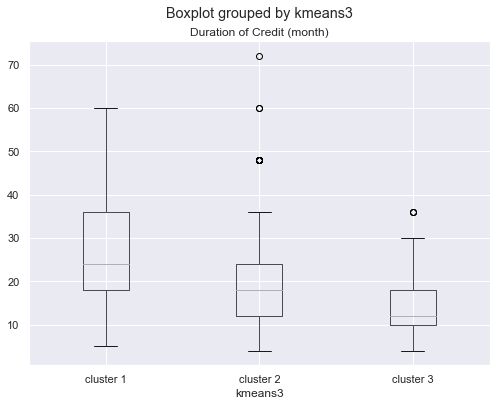

In [24]:
plt.figure(figsize=(12,12))
mytrain.boxplot('Duration of Credit (month)','kmeans3',figsize=(8,6))

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

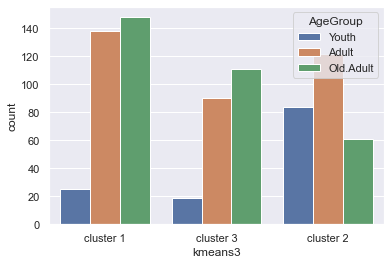

In [26]:
sns.countplot(x='kmeans3',hue='AgeGroup',data=mytrain)

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

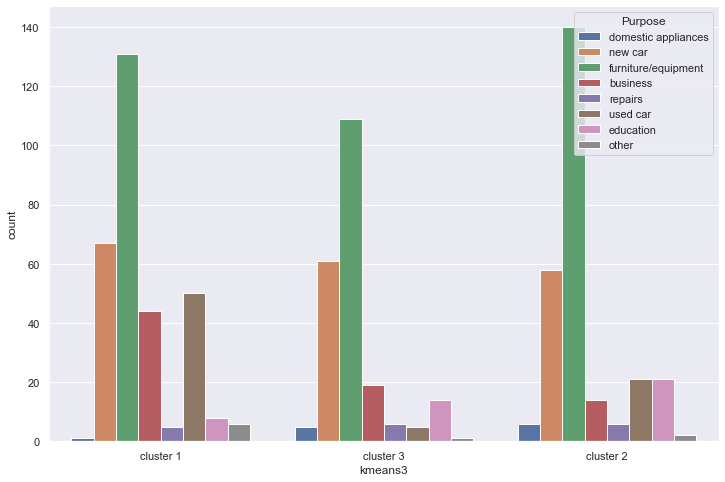

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x= 'kmeans3',hue='Purpose',data=mytrain)

<AxesSubplot:xlabel='kmeans4', ylabel='count'>

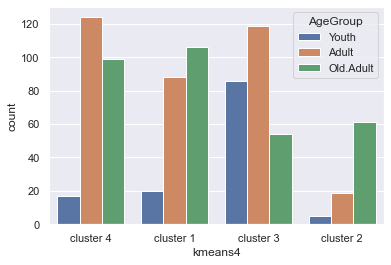

In [28]:
sns.countplot(x='kmeans4',hue='AgeGroup',data=mytrain)

<AxesSubplot:xlabel='kmeans3', ylabel='count'>

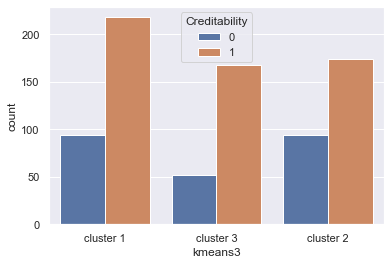

In [29]:
sns.countplot(x='kmeans3',hue='Creditability',data=mytrain)